# Handwritten Character Recognition
## Task 3 (CodeAlpha)

<hr>

### Importing the Libraries

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

### Preprocessing Functions
**Image data preprocessing.** After pre-processing, the images should be similar to ```MINST``` images.

    Preprocessing a single image to match the MNIST format.
    - Convert to grayscale.
    - Resize to 28x28 pixels.
    - Normalize pixel values to [0, 1].
    - Invert colors to match MNIST style (white digits on black background).


In [3]:
def preprocess_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 28x28 pixels (MNIST standard)
    img_resized = cv2.resize(img, (28, 28))
    
    # Normalize pixel values to the range [0, 1]
    img_normalized = img_resized / 255.0
    
    # Invert the colors (MNIST has white digits on a black background)
    img_inverted = 1 - img_normalized
    
    # Return the preprocessed image (flatten if needed for the model)
    return img_inverted

In [4]:
def load_images_and_labels(folder_path):
    images = []
    labels = []
    
    for file_name in os.listdir(folder_path):
        # Ensure the file is an image (ends with .png)
        if file_name.endswith(".png"):
            # Preprocess the image
            img = preprocess_image(os.path.join(folder_path, file_name))
            images.append(img)
            
            # Extract the numeric label from the file name
            label = int(file_name.split(".")[0])  # Extract the digit (e.g., '0.png' -> 0)
            labels.append(label)
    
    # Convert to NumPy arrays for compatibility with TensorFlow/Keras
    return np.array(images), np.array(labels)


### Load and Preprocess Testing Data
Digits 0-9 with own hand writing on paper, taken photo for loading.

In [7]:
# Path to the folder containing the dataset
folder_path = "/home/saky/Desktop/AIU_Academic/Year 3/Deep Learning/Lab3/dataset"

# Load images and labels
X_test, y_test = load_images_and_labels(folder_path)

# Reshape the images to match the model's input format
# Assuming the model expects images in the format (samples, 28, 28, 1)
X_test = X_test.reshape((-1, 28, 28, 1))

### Loading Saved Model

In [8]:
# Specify the path to your saved model
model_path = "/home/saky/Desktop/AIU_Academic/Year 3/Deep Learning/Lab3/my_trained_model.h5"
# Load the trained model
model = load_model(model_path)

### Model for Prediction

In [9]:
# Predict the labels for the test data
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


In [10]:
# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

### Evaluate Model Performance

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 80.00%


In [12]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.80        10
   macro avg       0.70      0.80      0.73        10
weighted avg       0.70      0.80      0.73        10



/home/saky/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saky/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saky/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Display detected and Undetected Images

In [13]:
def visualize_results(X_test, y_test, y_pred_classes):
    for i in range(len(y_test)):
        # Reshape the image back to 28x28 for visualization
        img = X_test[i].reshape(28, 28)
        true_label = y_test[i]
        predicted_label = y_pred_classes[i]
        
        # Plot the image
        plt.imshow(img, cmap='gray')
        plt.axis('off')  # Remove axes for better visualization
        
        # Add title based on detection status
        if true_label == predicted_label:
            plt.title(f"True: {true_label}, Predicted: {predicted_label}", color="green")
        else:
            plt.title(f"True: {true_label}, Predicted: {predicted_label}", color="red")
        
        # Show the image
        plt.show()

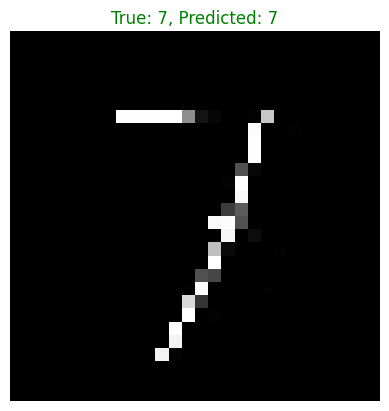

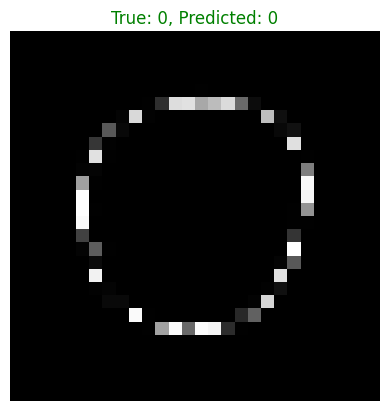

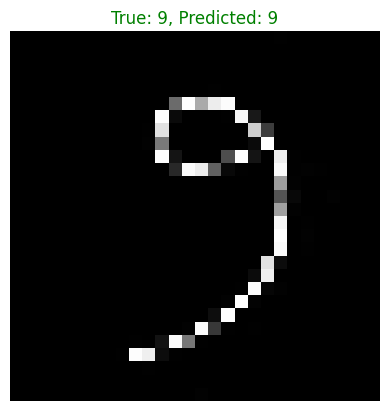

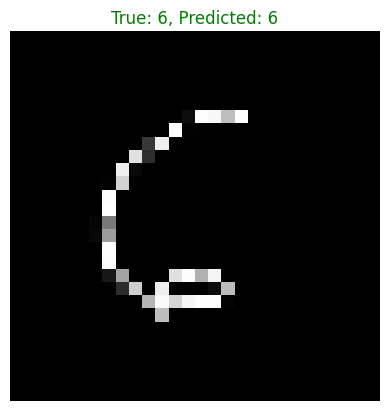

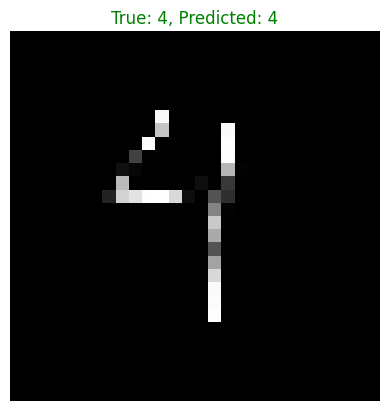

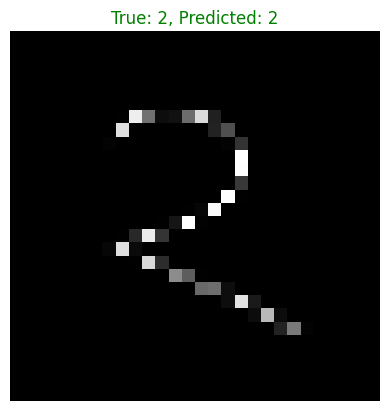

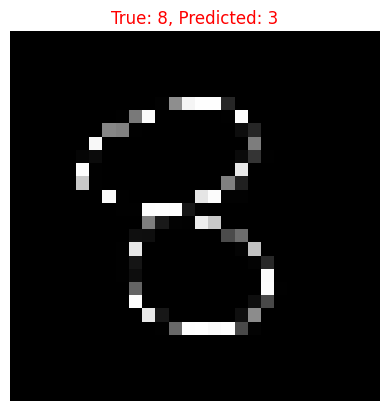

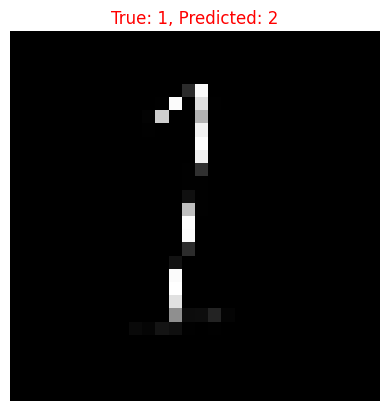

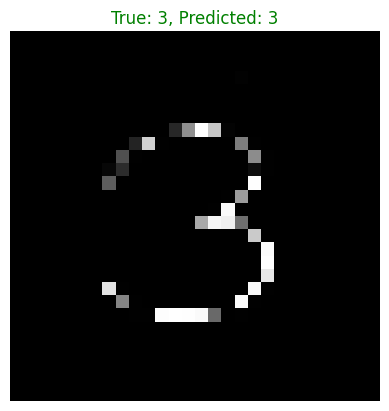

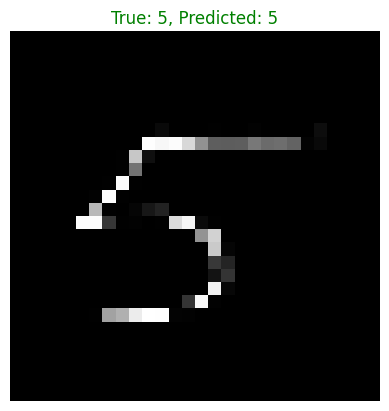

In [14]:
# Visualize the results
visualize_results(X_test, y_test, y_pred_classes)

### Result Analysis:
- From 10 digits of the testing loaded data, 8 digits could be predicted accurately and 2 digits were wrongly predicted.
- The model Accuracy is 80%.

__*Thank You!*__